In [1]:
pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, classification_report,precision_recall_curve
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,f1_score,roc_curve,auc
from sklearn.preprocessing import PolynomialFeatures
from PIL import Image
import io
from sklearn.decomposition import PCA

# Logistic Regression![stock_logit.PNG](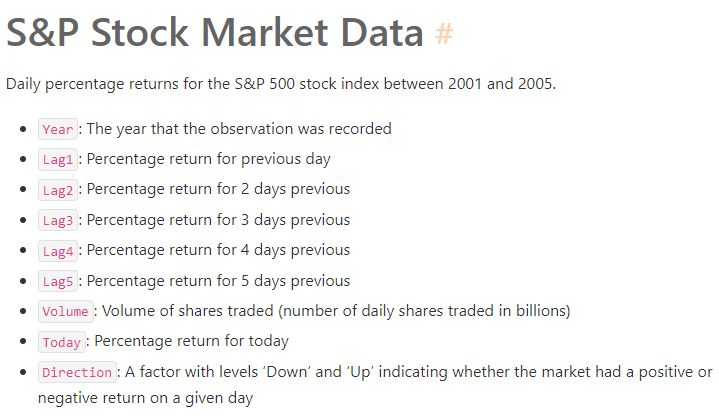![Polar_Bear_-_Alaska_(cropped).webp](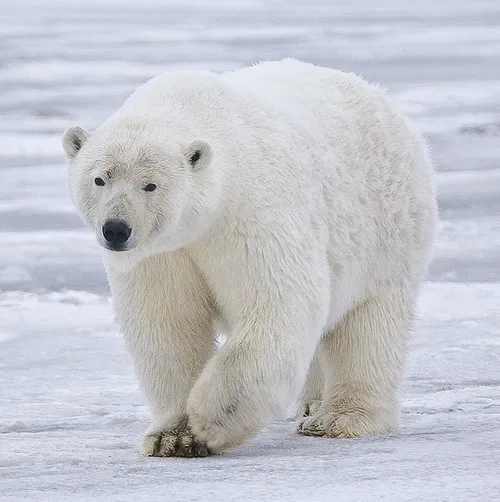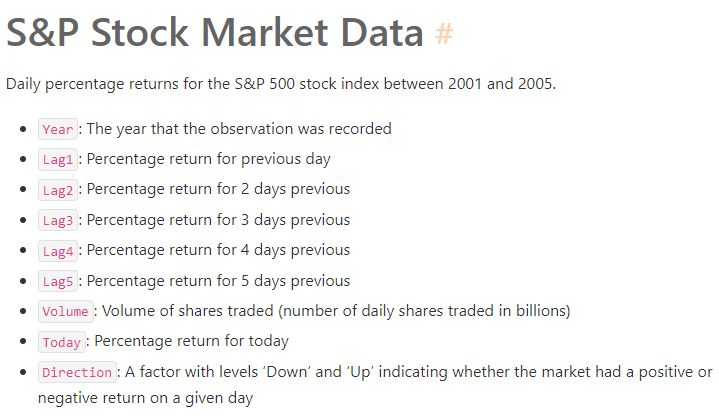))

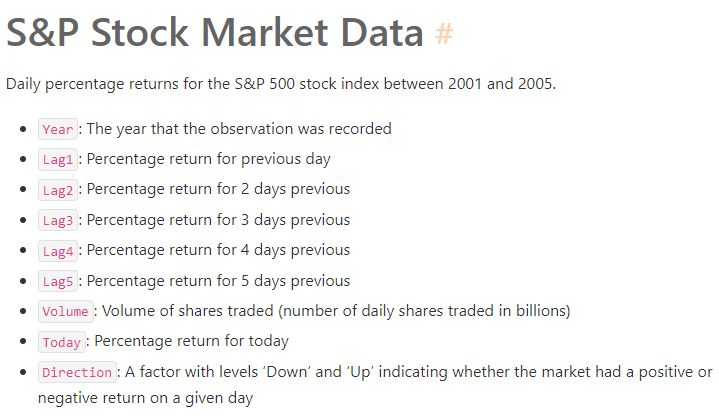

In [10]:
import yfinance as yf

# Define the ticker symbol for S&P 500
ticker = '^GSPC'

# Get the data for the S&P 500
sp500 = yf.Ticker(ticker)

# Get historical market data for the specified date range
start_date = "2017-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

sp = sp500.history(start=start_date, end=end_date)

# Display the first few rows of the historical data



In [11]:
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03 00:00:00-05:00,2251.570068,2263.879883,2245.129883,2257.830078,3773010000,0.0,0.0
2017-01-04 00:00:00-05:00,2261.600098,2272.820068,2261.600098,2270.750000,3768890000,0.0,0.0
2017-01-05 00:00:00-05:00,2268.179932,2271.500000,2260.449951,2269.000000,3785080000,0.0,0.0
2017-01-06 00:00:00-05:00,2271.139893,2282.100098,2264.060059,2276.979980,3342080000,0.0,0.0
2017-01-09 00:00:00-05:00,2273.590088,2275.489990,2268.899902,2268.899902,3219730000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-24 00:00:00-04:00,5281.450195,5311.649902,5278.390137,5304.720215,3005510000,0.0,0.0
2024-05-28 00:00:00-04:00,5315.910156,5315.910156,5280.890137,5306.040039,3751540000,0.0,0.0
2024-05-29 00:00:00-04:00,5278.729980,5282.270020,5262.700195,5266.950195,3552750000,0.0,0.0


In [12]:
sp['Return']=((sp['Close']-sp['Open'])/sp['Open'])*100
dic={'Lag1':sp['Return'][4:-1].values,'Lag2':sp['Return'][3:-2].values,'Lag3':sp['Return'][2:-3].values,'Lag4':sp['Return'][1:-4].values,
     'Lag5':sp['Return'][0:-5].values,
     'Volume':(sp['Volume'][4:-1].values)/1000000000,'Today':sp['Return'][5:].values}

In [13]:
Smarket=pd.DataFrame(dic)

In [141]:
Smarket['Direction']=['Up' if x >= 0 else 'Down' for x in Smarket['Today']]
Smarket.to_csv('sp500.csv', index=False)

In [15]:
Smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,-0.206290,0.257143,0.036155,0.404576,0.278029,3.21973,-0.036131,Down
1,-0.036131,-0.206290,0.257143,0.036155,0.404576,3.64056,0.296217,Up
2,0.296217,-0.036131,-0.206290,0.257143,0.036155,3.62508,-0.030819,Down
3,-0.030819,0.296217,-0.036131,-0.206290,0.257143,3.46622,0.083595,Up
4,0.083595,-0.030819,0.296217,-0.036131,-0.206290,3.09068,-0.055087,Down
...,...,...,...,...,...,...,...,...
1855,-1.356112,-0.230671,0.428789,0.052396,0.003204,3.86952,0.440599,Up
1856,0.440599,-1.356112,-0.230671,0.428789,0.052396,3.00551,-0.185671,Down
1857,-0.185671,0.440599,-1.356112,-0.230671,0.428789,3.75154,-0.223156,Down
1858,-0.223156,-0.185671,0.440599,-1.356112,-0.230671,3.55275,-0.461808,Down


In [16]:
Smarket['Direction'] = Smarket['Direction'].replace({'Up': 1, 'Down': 0})
Smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,-0.206290,0.257143,0.036155,0.404576,0.278029,3.21973,-0.036131,0
1,-0.036131,-0.206290,0.257143,0.036155,0.404576,3.64056,0.296217,1
2,0.296217,-0.036131,-0.206290,0.257143,0.036155,3.62508,-0.030819,0
3,-0.030819,0.296217,-0.036131,-0.206290,0.257143,3.46622,0.083595,1
4,0.083595,-0.030819,0.296217,-0.036131,-0.206290,3.09068,-0.055087,0
...,...,...,...,...,...,...,...,...
1855,-1.356112,-0.230671,0.428789,0.052396,0.003204,3.86952,0.440599,1
1856,0.440599,-1.356112,-0.230671,0.428789,0.052396,3.00551,-0.185671,0
1857,-0.185671,0.440599,-1.356112,-0.230671,0.428789,3.75154,-0.223156,0
1858,-0.223156,-0.185671,0.440599,-1.356112,-0.230671,3.55275,-0.461808,0


In [17]:
Smarket['Direction'].value_counts()

1    1004
0     856
Name: Direction, dtype: int64

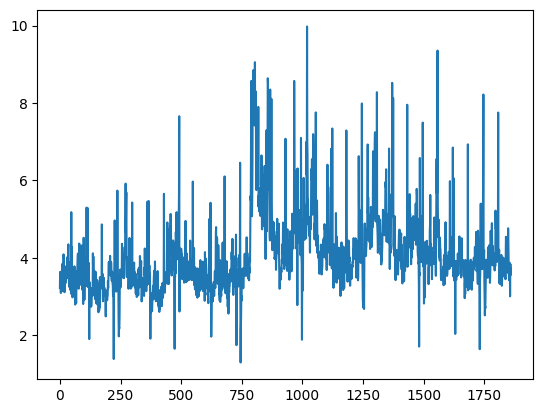

In [18]:
plt.plot(np.arange(len(Smarket)),Smarket['Volume'].values)

In [103]:
def class_report(y_train,y_test,train_predictions,test_predictions):
  class_report_test = classification_report(y_test, test_predictions)
  class_report_train = classification_report(y_train, train_predictions)

  print("Classification Report train:")
  print(class_report_train)

  print("Classification Report test:")
  print(class_report_test)

In [130]:
def conf_matrix(y_train,y_test,train_predictions,test_predictions):



  conf_matrix_test = confusion_matrix(y_test, test_predictions)

  conf_matrix_train = confusion_matrix(y_train, train_predictions)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
  axes[0].set_xlabel('Predicted')
  axes[0].set_ylabel('Actual')
  axes[0].set_title('Confusion Matrix Heatmap (Test)')

  sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
  axes[1].set_xlabel('Predicted')
  axes[1].set_ylabel('Actual')
  axes[1].set_title('Confusion Matrix Heatmap (Train)')

  plt.tight_layout()
  plt.show()

In [105]:
# Features and target variable

X = Smarket.drop(['Direction','Today'], axis=1)
y = Smarket['Direction']

scaler_X = MinMaxScaler()
X = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)

scaler_y = MinMaxScaler()
y = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1,1)), columns=['Direction'])


# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y['Direction'], test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test data
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)


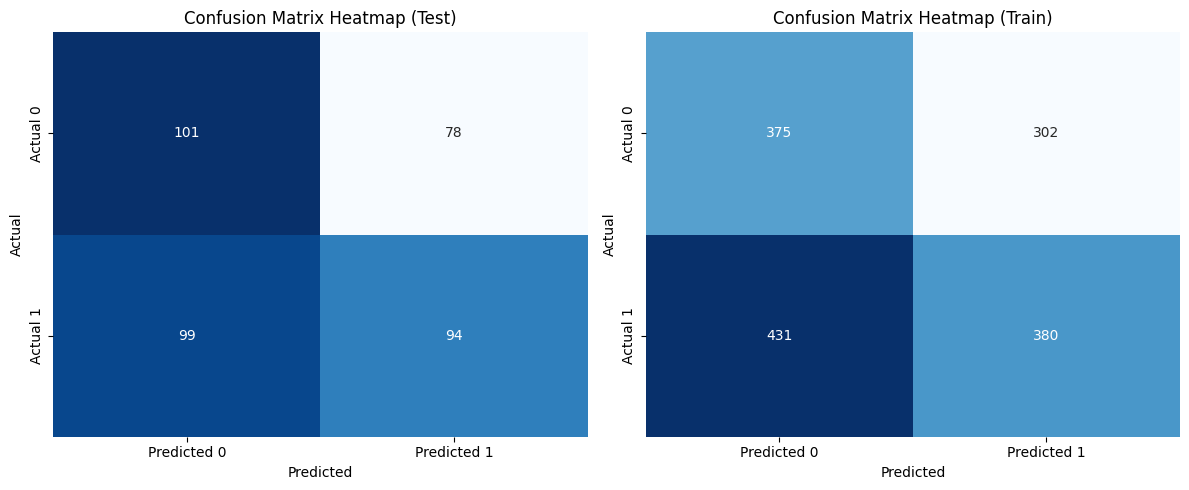

In [106]:
conf_matrix(y_train,y_test,train_predictions,test_predictions)

In [107]:
class_report(y_train,y_test,train_predictions,test_predictions)

Classification Report train:
              precision    recall  f1-score   support

         0.0       0.47      0.55      0.51       677
         1.0       0.56      0.47      0.51       811

    accuracy                           0.51      1488
   macro avg       0.51      0.51      0.51      1488
weighted avg       0.52      0.51      0.51      1488

Classification Report test:
              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53       179
         1.0       0.55      0.49      0.52       193

    accuracy                           0.52       372
   macro avg       0.53      0.53      0.52       372
weighted avg       0.53      0.52      0.52       372



In [108]:
coefficients = logreg.coef_[0]
feature_names = X.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("Coefficients:")
print(coeff_df)

Coefficients:
  Feature  Coefficient
0    Lag1    -0.147035
1    Lag2     0.212404
2    Lag3    -0.266339
3    Lag4    -0.217435
4    Lag5    -0.252603
5  Volume    -0.002907


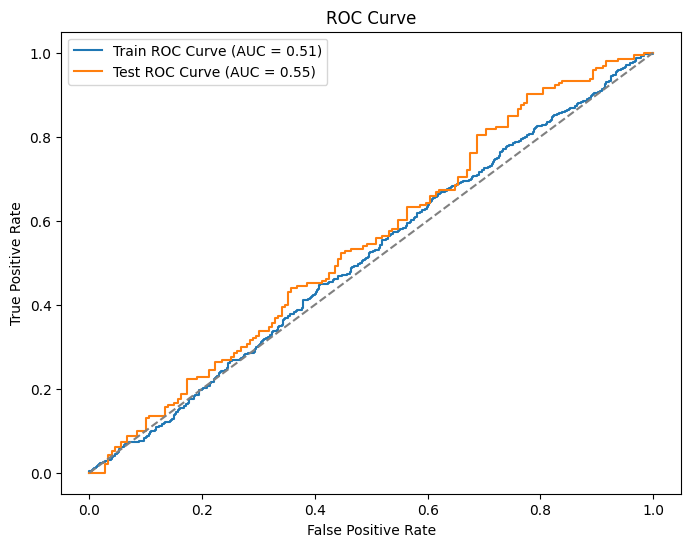

In [109]:
# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
fpr_test, tpr_test, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# AUC Score
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)



# Plot ROC curve with AUC line
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Default of Credit Card Clients

In [110]:
Default=pd.read_csv('default.csv')
Default = Default.rename(columns={'default payment next month': 'default'})
Default=Default.drop('ID', axis=1)
Default.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [111]:
Default['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

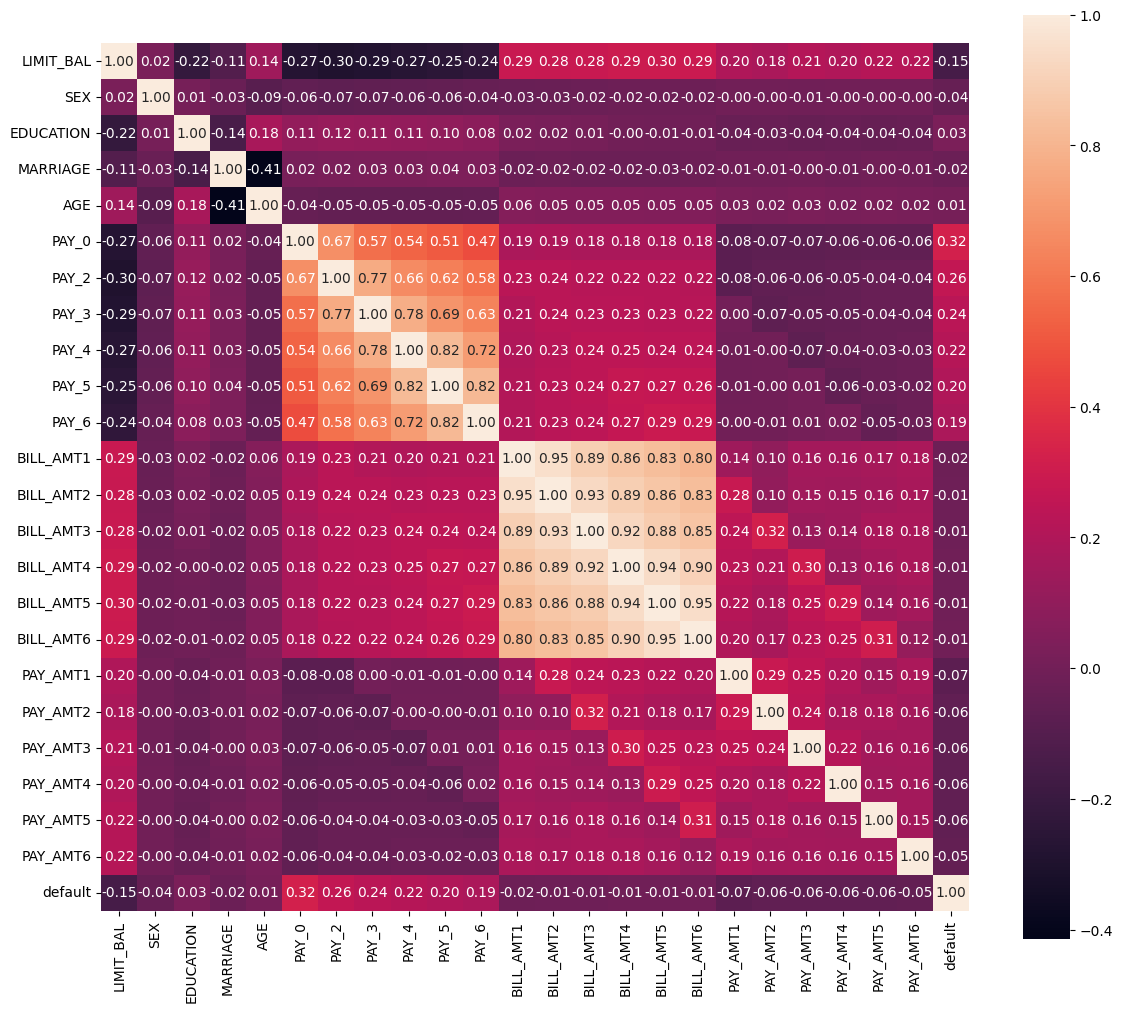

In [112]:
plt.figure(figsize=(14, 12))
sns.heatmap(Default.corr(),cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},

                 )
plt.show()

In [123]:
# Features and target variable
X = Default.drop('default', axis=1)
y = Default['default']


scaler_X = MinMaxScaler()
X = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)

scaler_y = MinMaxScaler()
y = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1,1)), columns=['default'])


# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y['default'], test_size=0.2, random_state=42)


# Create a logistic regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test data
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)



In [125]:
train_predictions

array([0., 1., 0., ..., 0., 0., 0.])

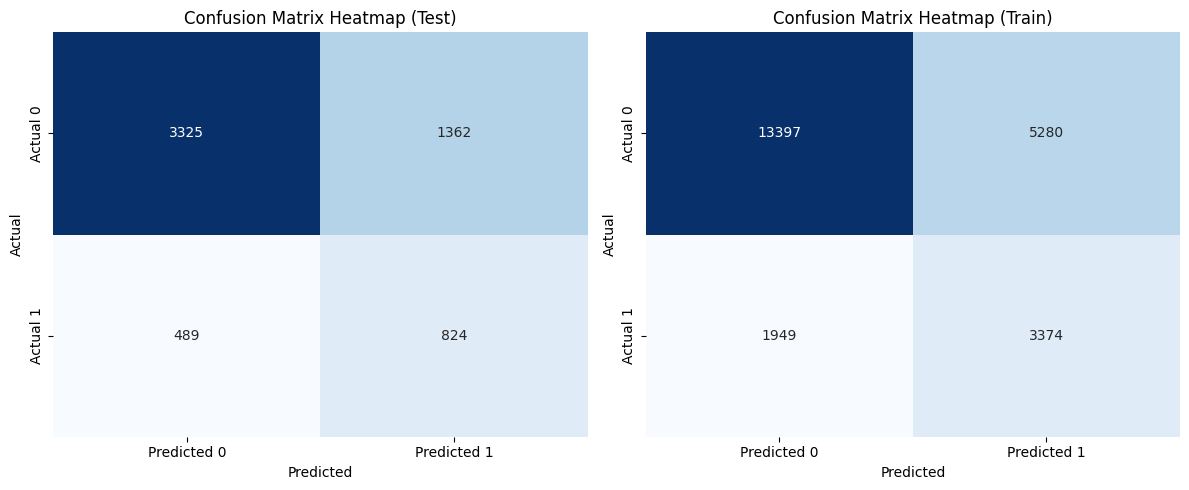

In [127]:
conf_matrix(y_train,y_test,train_predictions,test_predictions)

In [115]:
class_report(y_train,y_test,train_predictions,test_predictions)

Classification Report train:
              precision    recall  f1-score   support

         0.0       0.87      0.72      0.79     18677
         1.0       0.39      0.63      0.48      5323

    accuracy                           0.70     24000
   macro avg       0.63      0.68      0.64     24000
weighted avg       0.77      0.70      0.72     24000

Classification Report test:
              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78      4687
         1.0       0.38      0.63      0.47      1313

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000



In [116]:
coefficients = logreg.coef_[0]
feature_names = X.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("Coefficients:")
print(coeff_df)

Coefficients:
      Feature  Coefficient
0   LIMIT_BAL    -0.967299
1         SEX    -0.114140
2   EDUCATION    -0.531442
3    MARRIAGE    -0.416074
4         AGE     0.523367
5       PAY_0     5.033677
6       PAY_2     1.050994
7       PAY_3     0.679744
8       PAY_4     0.353203
9       PAY_5     0.091244
10      PAY_6    -0.043976
11  BILL_AMT1    -1.998265
12  BILL_AMT2    -0.020054
13  BILL_AMT3    -0.476903
14  BILL_AMT4    -0.392966
15  BILL_AMT5     0.100012
16  BILL_AMT6     0.460102
17   PAY_AMT1    -3.355434
18   PAY_AMT2    -2.875331
19   PAY_AMT3    -1.344251
20   PAY_AMT4    -1.640142
21   PAY_AMT5    -0.810711
22   PAY_AMT6    -1.302572


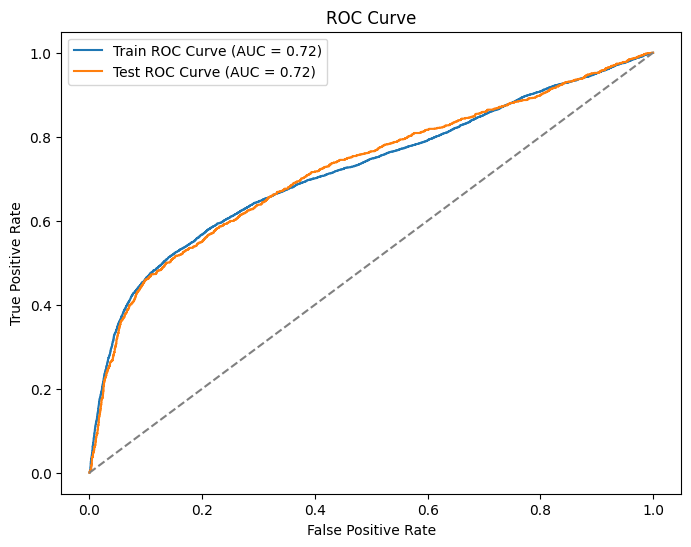

In [117]:
# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
fpr_test, tpr_test, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# AUC Score
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)



# Plot ROC curve with AUC line
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# We can imagine that having a 10% FPR (90% TNR) can be considered perfect.

In [134]:
tresh=np.linspace(min(logreg.predict_proba(X_train)[:,1]),1,100)
precision=[]
TPR=[]
FPR=[]
TNR=[]

for threshold in tresh:
  train_pre=(logreg.predict_proba(X_train)[:,1]> threshold).astype(int)
  confi_matrix = confusion_matrix(y_train, train_pre)


  precision.append(confi_matrix[0, 0]/(confi_matrix[1, 0]+confi_matrix[0, 0]))
  TPR.append(confi_matrix[0, 0]/(confi_matrix[0, 0]+confi_matrix[0, 1]))
  FPR.append(confi_matrix[1, 0]/(confi_matrix[1, 0]+confi_matrix[1, 1]))
  TNR.append(confi_matrix[1, 1]/(confi_matrix[1, 0]+confi_matrix[1, 1]))

TPR=np.array(TPR)
FPR=np.array(FPR)
TNR=np.array(TNR)


In [135]:
optimal_idx = np.where(FPR < 0.1)[0][-1]
optimal_threshold = tresh[optimal_idx]

train_predictions = ((logreg.predict_proba(X_train)[:,1])> optimal_threshold).astype(int)
test_predictions = ((logreg.predict_proba(X_test)[:,1])> optimal_threshold).astype(int)

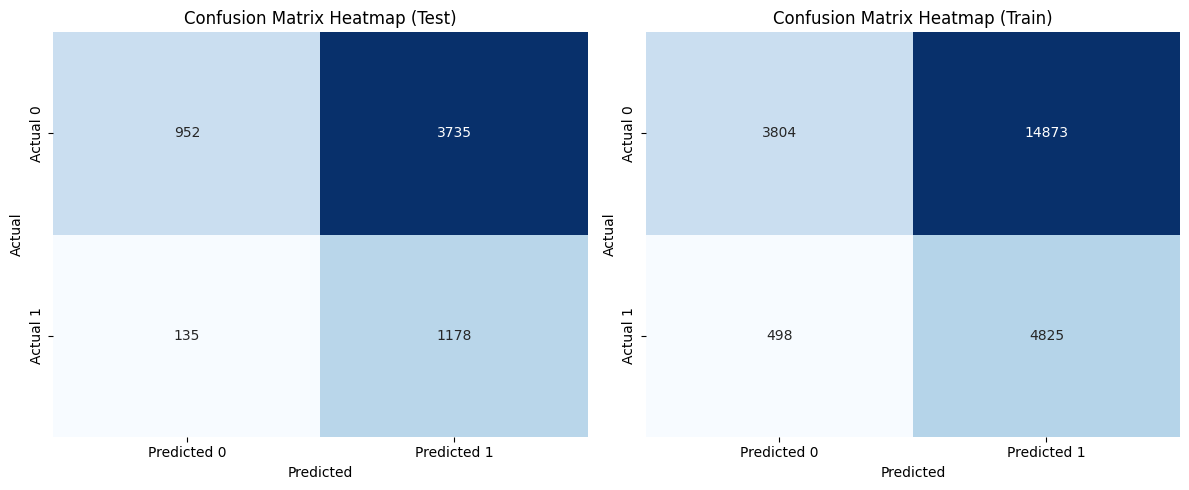

In [136]:
conf_matrix(y_train,y_test,train_predictions,test_predictions)

In [137]:
class_report(y_train,y_test,train_predictions,test_predictions)

Classification Report train:
              precision    recall  f1-score   support

         0.0       0.88      0.20      0.33     18677
         1.0       0.24      0.91      0.39      5323

    accuracy                           0.36     24000
   macro avg       0.56      0.56      0.36     24000
weighted avg       0.74      0.36      0.34     24000

Classification Report test:
              precision    recall  f1-score   support

         0.0       0.88      0.20      0.33      4687
         1.0       0.24      0.90      0.38      1313

    accuracy                           0.36      6000
   macro avg       0.56      0.55      0.35      6000
weighted avg       0.74      0.35      0.34      6000



# Credit Card Balance Data

A simulated data set containing information on 400 customers.

 **Income**: Income in $1,000’s

**Limit**: Credit limit

**Rating**: Credit rating

**Cards**: Number of credit cards

**Age**: Age in years

**Education**: Education in years

**Own**: A factor with levels No and Yes indicating whether the individual owns a home

**Student**: A factor with levels No and Yes indicating whether the individual is a student

**Married**: A factor with levels No and Yes indicating whether the individual is married

**Region**: A factor with levels East, South, and West indicating the individual’s geographical location

**Balance**: Average credit card balance in $

In [147]:
Credit = load_data('Credit')
Credit = Credit.drop('ID', axis=1)
Credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [140]:
Credit.to_csv('Credit_processed.csv', index=False)

In [148]:
#dummy variables
Credit['Ethnicity'] = Credit['Ethnicity'].astype('category').cat.codes
Credit = pd.get_dummies(Credit, columns=['Ethnicity'])

In [149]:
#Categorical variables
Credit['Married'] = Credit['Married'].replace({'Yes': 1, 'No': 0})
Credit['Student'] = Credit['Student'].replace({'Yes': 1, 'No': 0})
Credit['Gender'] = Credit['Gender'].replace({' Male': 1, 'Female': 0})



In [150]:
Credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_0,Ethnicity_1,Ethnicity_2
0,14.891,3606,283,2,34,11,1,0,1,333,0,0,1
1,106.025,6645,483,3,82,15,0,1,1,903,0,1,0
2,104.593,7075,514,4,71,11,1,0,0,580,0,1,0
3,148.924,9504,681,3,36,11,0,0,0,964,0,1,0
4,55.882,4897,357,2,68,16,1,0,1,331,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,560,0,0,1
396,13.364,3838,296,5,65,17,1,0,0,480,1,0,0
397,57.872,4171,321,5,67,12,0,0,1,138,0,0,1
398,37.728,2525,192,1,44,13,1,0,1,0,0,0,1


<Axes: >

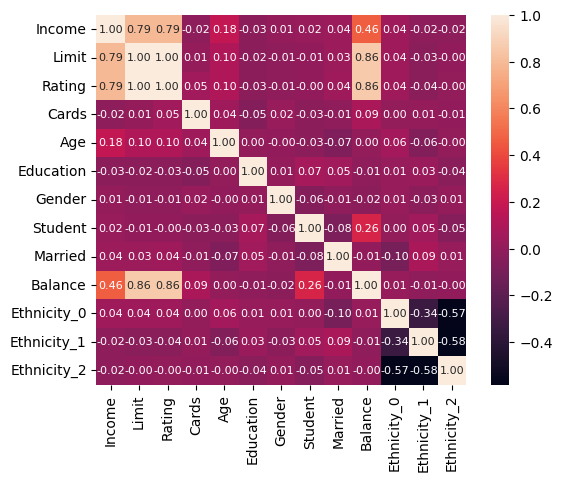

In [151]:
sns.heatmap(Credit.corr(),cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},

                 )

In [152]:
#X = Credit.drop(['Balance','Age','Limit','Cards','Education','Gender','Married','Ethnicity'], axis=1)
X = Credit.drop(['Balance'], axis=1)
y = Credit[['Balance']]

# Split the data (80% training, 20% testing)


In [153]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity_0,Ethnicity_1,Ethnicity_2
0,14.891,3606,283,2,34,11,1,0,1,0,0,1
1,106.025,6645,483,3,82,15,0,1,1,0,1,0
2,104.593,7075,514,4,71,11,1,0,0,0,1,0
3,148.924,9504,681,3,36,11,0,0,0,0,1,0
4,55.882,4897,357,2,68,16,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,0,1
396,13.364,3838,296,5,65,17,1,0,0,1,0,0
397,57.872,4171,321,5,67,12,0,0,1,0,0,1
398,37.728,2525,192,1,44,13,1,0,1,0,0,1


In [154]:
scaler_X = MinMaxScaler()
X = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)

scaler_y = MinMaxScaler()
y = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1,1)), columns=['Balance'])


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

X_train = X_train.drop('index', axis=1)
X_test = X_test.drop('index', axis=1)
y_train = y_train.drop('index', axis=1)
y_test = y_test.drop('index', axis=1)

In [ ]:
#q=Credit.sort_values(by='Limit', ascending=False)[['Limit','Balance']]
#q

In [158]:
X_train

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity_0,Ethnicity_1,Ethnicity_2
0,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.222464,0.423419,0.399325,0.000,0.066667,0.266667,0.0,0.0,1.0,0.0,1.0,0.0
2,0.060608,0.045413,0.058493,0.125,0.466667,0.533333,0.0,0.0,1.0,0.0,0.0,1.0
3,0.000051,0.120616,0.110236,0.125,0.320000,0.866667,0.0,0.0,1.0,0.0,1.0,0.0
4,0.114568,0.383979,0.389201,0.500,0.773333,0.266667,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.274716,0.501378,0.500562,0.125,0.773333,0.466667,0.0,0.0,1.0,0.0,1.0,0.0
316,0.036675,0.036912,0.024747,0.125,0.680000,0.666667,1.0,0.0,1.0,0.0,1.0,0.0
317,0.031268,0.170777,0.139483,0.000,0.213333,0.533333,1.0,0.0,0.0,0.0,0.0,1.0
318,0.017467,0.021366,0.021372,0.250,0.626667,0.600000,1.0,0.0,1.0,0.0,0.0,1.0


In [159]:
X_t = sm.add_constant(X_train)  # Add a constant term (intercept)
model = sm.OLS(y_train, X_t).fit()


# Access standard errors of the coefficients

# Access p-values of the coefficients

# Access R-squared of the model
pre_train=model.predict(X_t)
print(model.summary())
r2_score(y_train,pre_train)


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     597.4
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.13e-200
Time:                        17:57:43   Log-Likelihood:                 505.53
No. Observations:                 320   AIC:                            -987.1
Df Residuals:                     308   BIC:                            -941.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1080      0.010    -11.238      

0.9552255011405162

# Sensivity Analysis

In [160]:
coeff = dict(model.params)
Sensitivity_Analysis = pd.DataFrame(data=coeff.values(), index=coeff.keys(), columns=['coeff'])
Sensitivity_Analysis['coeff_normalize']=abs((Sensitivity_Analysis['coeff'])/np.sum(abs(Sensitivity_Analysis['coeff'])))
id=pre_train.idxmax()
#=np.insert(X_train.iloc[id].values, 0, 1)
Sensitivity_Analysis['Max_Balance']=X_train.iloc[id].T
Sensitivity_Analysis['Ave_train']=X_train.mean()
Sensitivity_Analysis['Contribution_of_each_feature']=(Sensitivity_Analysis['Max_Balance']-Sensitivity_Analysis['Ave_train'])*Sensitivity_Analysis['coeff']
Sensitivity_Analysis['Contribution_of_each_feature'][0]=Sensitivity_Analysis['coeff'][0]
Sensitivity_Analysis.sort_values(by='Contribution_of_each_feature', ascending=False)


,coeff,coeff_normalize,Max_Balance,Ave_train,Contribution_of_each_feature
Limit,1.293768,0.440974,1.000000,0.296309,0.910413
Rating,0.431955,0.147230,1.000000,0.294031,0.304947
Cards,0.076534,0.026086,0.375000,0.241797,0.010195
Ethnicity_0,-0.040152,0.013686,0.000000,0.253125,0.010164
Ethnicity_1,-0.033501,0.011419,0.000000,0.259375,0.008689
Gender,0.006250,0.002130,1.000000,0.490625,0.003184
Married,-0.003077,0.001049,1.000000,0.603125,-0.001221
Education,-0.008094,0.002759,0.800000,0.567500,-0.001882
Age,-0.022650,0.007720,1.000000,0.447542,-0.012513
Ethnicity_2,-0.034391,0.011722,1.000000,0.487500,-0.017625


In [ ]:
id=pre_train.idxmax()
arr_with_element = np.insert(X_train.iloc[id].values, 0, 1)
max_train_balance=model.predict(arr_with_element)
print(max_train_balance)

arr_with_element = np.insert(X_train.mean().values, 0, 1)
mean_train_balance=model.predict(arr_with_element)
print(mean_train_balance)


[0.93480351]
[0.25954227]


In [161]:
data_train_accurcy=[]
#dict_temp={}

In [162]:
pre_test=model.predict(sm.add_constant(X_test))
r2_score(y_test,pre_test)

0.9522674050276407

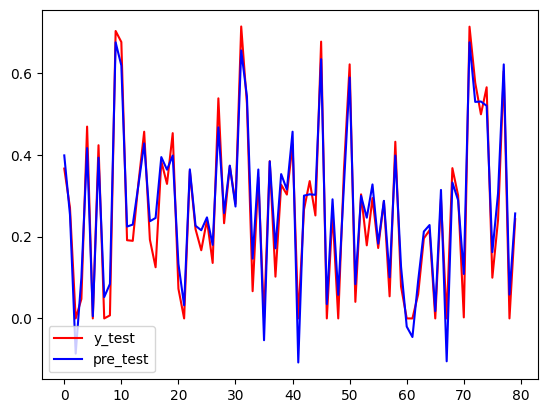

In [ ]:
plt.plot(np.arange(len(y_test)),y_test,color='red',label='y_test')
plt.plot(np.arange(len(y_test)),pre_test,color='blue',label='pre_test')
plt.legend()

plt.show()

In [ ]:
pre_test

0      779.572898
1      565.215728
2     -126.825562
3      202.981104
4      871.959683
         ...     
75     300.791981
76     566.501420
77    1177.032575
78     129.358165
79     537.745789
Length: 80, dtype: float64

In [163]:
MAE_train= mean_absolute_error(y_train,pre_train)
MSE_train= mean_squared_error(y_train,pre_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,pre_train))
r_sq_train = r2_score(y_train,pre_train)
dict_temp_Train={'MAE':MAE_train,'MSE':MSE_train,'RMSE':RMSE_train,'R2_squared':r_sq_train}
#data_train_accurcy=pd.DataFrame(data=dict_linear,index=['Multi_Linear_Regression_Train'])

In [164]:
MAE_test= mean_absolute_error(y_test,pre_test)
MSE_test= mean_squared_error(y_test,pre_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,pre_test))
r_sq_test = r2_score(y_test,pre_test)
dict_temp_Test={'MAE':MAE_test,'MSE':MSE_test,'RMSE':RMSE_test,'R2_squared':r_sq_test}
#data_train_accurcy=pd.DataFrame(data=dict_linear,index=['Multi_Linear_Regression_Test'])

In [165]:
data_train_accurcy.append(dict_temp_Train)
data_train_accurcy.append(dict_temp_Test)
data_train_accurcy_df = pd.DataFrame(data_train_accurcy, index=['Multi_Linear_Regression_Train', 'Multi_Linear_Regression_Test'])

In [166]:
data_train_accurcy_df

,MAE,MSE,RMSE,R2_squared
Multi_Linear_Regression_Train,0.040420,0.002485,0.049851,0.955226
Multi_Linear_Regression_Test,0.037181,0.001996,0.044673,0.952267


In [167]:
dict_poly={}

In [168]:
MAE= mean_absolute_error(y_train,pre_train)
MSE= mean_squared_error(y_train,pre_train)
RMSE= np.sqrt(mean_squared_error(y_train,pre_train))
r_sq = r2_score(y_train,pre_train)
dict_linear={'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2_squared':r_sq}
data_train_accurcy=pd.DataFrame(data=dict_linear,index=['LinearRegression'])

In [169]:
degree = list(range(2, 6))
data_train_accuracy = []

for n in degree:


    pr = PolynomialFeatures(degree=n)
    '''
    X_poly = pr.fit_transform(X)
    original_feature_names = X.columns.tolist()
    feature_names = pr.get_feature_names_out(original_feature_names)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)

    scaler_X = MinMaxScaler()
    X_poly = pd.DataFrame(scaler_X.fit_transform(X_poly), columns=X_poly.columns)

    X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    X_poly_train.reset_index(inplace=True)
    X_poly_test.reset_index(inplace=True)
    y_train.reset_index(inplace=True)
    y_test.reset_index(inplace=True)

    X_poly_train = X_poly_train.drop('index', axis=1)
    X_poly_test = X_poly_test.drop('index', axis=1)
    y_train = y_train.drop('index', axis=1)
    y_test = y_test.drop('index', axis=1)

    '''


    X_poly_train = pr.fit_transform(X_train)
    original_feature_names = X_train.columns.tolist()
    feature_names = pr.get_feature_names_out(original_feature_names)
    poly_df = pd.DataFrame(X_poly_train, columns=feature_names)
    #model = sm.OLS(y_train, poly_df).fit_regularized(alpha=0.01,L1_wt=0.5)
    model = sm.OLS(y_train, poly_df).fit()
    pre_train = model.predict(poly_df)

    MAE = mean_absolute_error(y_train, pre_train)
    MSE = mean_squared_error(y_train, pre_train)
    RMSE = np.sqrt(mean_squared_error(y_train, pre_train))
    r_sq = r2_score(y_train, pre_train)
    dict_poly = {'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'R2_squared': r_sq}
    data_train_accuracy.append(dict_poly)

data_train_accurcy_df = pd.DataFrame(data_train_accuracy, index=['Polynomial Regression_' + str(n) for n in degree])

In [170]:
data_train_accurcy_df

,MAE,MSE,RMSE,R2_squared
Polynomial Regression_2,1.927008e-02,5.605045e-04,2.367498e-02,0.989901
Polynomial Regression_3,2.851696e-03,1.663587e-05,4.078710e-03,0.999700
Polynomial Regression_4,3.890906e-15,3.413552e-29,5.842561e-15,1.000000
Polynomial Regression_5,3.335936e-15,3.174790e-29,5.634528e-15,1.000000


In [229]:
pr = PolynomialFeatures(degree=4)

'''
X_poly = pr.fit_transform(X)
original_feature_names = X.columns.tolist()
feature_names = pr.get_feature_names_out(original_feature_names)
X_poly = pd.DataFrame(X_poly, columns=feature_names)

scaler_X = MinMaxScaler()
X_poly = pd.DataFrame(scaler_X.fit_transform(X_poly), columns=X_poly.columns)

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

X_poly_train.reset_index(inplace=True)
X_poly_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

X_poly_train = X_poly_train.drop('index', axis=1)
X_poly_test = X_poly_test.drop('index', axis=1)
y_train = y_train.drop('index', axis=1)
y_test = y_test.drop('index', axis=1)



poly_df = pd.DataFrame(X_poly_train, columns=feature_names)
#model = sm.OLS(y_train, poly_df).fit_regularized(alpha=0.01,L1_wt=0.5)
pol_reg = sm.OLS(y_train, poly_df).fit()
pre_train = pol_reg.predict(poly_df)

'''

X_poly_train = pr.fit_transform(X_train)
original_feature_names = X_train.columns.tolist()
feature_names = pr.get_feature_names_out(original_feature_names)
poly_df = pd.DataFrame(X_poly_train, columns=feature_names)
#pol_reg = sm.OLS(y_train, poly_df).fit_regularized(alpha=0.01,L1_wt=0.5)
pol_reg = sm.OLS(y_train, poly_df).fit()
#print(model.summary())
pre_train=pol_reg.predict(poly_df)

X_poly_test = pr.fit_transform(X_test)
pre_test=pol_reg.predict(X_poly_test)


In [230]:
MAE_train= mean_absolute_error(y_train,pre_train)
MSE_train= mean_squared_error(y_train,pre_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,pre_train))
r_sq_train = r2_score(y_train,pre_train)
dict_temp_Train={'MAE':MAE_train,'MSE':MSE_train,'RMSE':RMSE_train,'R2_squared':r_sq_train}
#data_train_accurcy=pd.DataFrame(data=dict_linear,index=['Multi_Linear_Regression_Train'])

In [231]:
MAE_test= mean_absolute_error(y_test,pre_test)
MSE_test= mean_squared_error(y_test,pre_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,pre_test))
r_sq_test = r2_score(y_test,pre_test)
dict_temp_Test={'MAE':MAE_test,'MSE':MSE_test,'RMSE':RMSE_test,'R2_squared':r_sq_test}
#data_train_accurcy=pd.DataFrame(data=dict_linear,index=['Multi_Linear_Regression_Test'])

In [232]:
data_test_accurcy=[]
data_test_accurcy.append(dict_temp_Train)
data_test_accurcy.append(dict_temp_Test)
data_test_accurcy = pd.DataFrame(data_test_accurcy, index=['Multi_poly_Regression_Train_4', 'Multi_poly_Regression_Test_4'])

In [233]:
data_test_accurcy

,MAE,MSE,RMSE,R2_squared
Multi_poly_Regression_Train_4,3.890906e-15,3.413552e-29,5.842561e-15,1.000000
Multi_poly_Regression_Test_4,5.545775e-02,9.080685e-03,9.529263e-02,0.782812


In [234]:
l2_norm = np.linalg.norm(pol_reg.params, ord=2)

print("L2 norm of the vector:", l2_norm)


L2 norm of the vector: 8.718582624518284


In [235]:
X_poly_test = pr.fit_transform(X_test)
pre_test=pol_reg.predict(X_poly_test)

#r_sq =r2_score(y_test,pre_test)
#r_sq

In [236]:
MAE_test = mean_absolute_error(y_test, pre_test)
MSE_test = mean_squared_error(y_test, pre_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, pre_test))
r_sq_test = r2_score(y_test, pre_test)
dict_poly_test = {'MAE_test': MAE_test, 'MSE_test': MSE_test, 'RMSE_test': RMSE_test, 'R2_squared_test': r_sq_test}
data_test_accurcy=pd.DataFrame(data=dict_poly_test,index=['polynomial_Regression_4'])

In [237]:
data_test_accurcy

,MAE_test,MSE_test,RMSE_test,R2_squared_test
polynomial_Regression_4,0.055458,0.009081,0.095293,0.782812


In [ ]:
poly_df.columns[100:120]

Index(['Income Age^2', 'Income Age Education', 'Income Age Gender',
       'Income Age Student', 'Income Age Married', 'Income Age Ethnicity',
       'Income Education^2', 'Income Education Gender',
       'Income Education Student', 'Income Education Married',
       'Income Education Ethnicity', 'Income Gender^2',
       'Income Gender Student', 'Income Gender Married',
       'Income Gender Ethnicity', 'Income Student^2', 'Income Student Married',
       'Income Student Ethnicity', 'Income Married^2',
       'Income Married Ethnicity'],
      dtype='object')

In [245]:
def  regularization(regu,landa):



  #pr = PolynomialFeatures(degree=4)
  #X_poly_train = pr.fit_transform(X_train)
  #original_feature_names = X_train.columns.tolist()
  #feature_names = pr.get_feature_names_out(original_feature_names)
  #poly_df = pd.DataFrame(X_poly_train, columns=feature_names)
  if landa==0:

    pol_reg = sm.OLS(y_train, poly_df).fit()

  else:
    pol_reg = sm.OLS(y_train, poly_df).fit_regularized(alpha=landa,L1_wt=regu)

  pre_train=pol_reg.predict(poly_df)
  #X_poly_test = pr.fit_transform(X_test)
  pre_test=pol_reg.predict(X_poly_test)


  #MAE_train = mean_absolute_error(y_train, pre_train)
  MSE_train = mean_squared_error(y_train, pre_train)
  #RMSE_train = np.sqrt(mean_squared_error(y_train, pre_train))
  r_sq_train = r2_score(y_train, pre_train)
  dict_poly_train = {'MSE_train': MSE_train, 'R2_squared_train': r_sq_train}
  data_train_accurcy=pd.DataFrame(data=dict_poly_train,index=['polynomial_Regression_4'])



  #MAE_test = mean_absolute_error(y_test, pre_test)
  MSE_test = mean_squared_error(y_test, pre_test)
  #RMSE_test = np.sqrt(mean_squared_error(y_test, pre_test))
  r_sq_test = r2_score(y_test, pre_test)
  dict_poly_test = {'MSE_test': MSE_test, 'R2_squared_test': r_sq_test}
  data_test_accurcy=pd.DataFrame(data=dict_poly_test,index=['polynomial_Regression_4'])



  l2_norm = np.linalg.norm(pol_reg.params, ord=2)


  # Count the number of zeros coeff
  zero_count = np.count_nonzero(pol_reg.params == 0)


  '''
  pol_reg = sm.OLS(y_train, X_poly_train).fit_regularized(alpha=landa,L1_wt=regu)
  pre_train=pol_reg.predict(X_poly_train)
  pre_test=pol_reg.predict(X_poly_test)

  MAE_train = mean_absolute_error(y_train, pre_train)
  MSE_train = mean_squared_error(y_train, pre_train)
  RMSE_train = np.sqrt(mean_squared_error(y_train, pre_train))
  r_sq_train = r2_score(y_train, pre_train)
  dict_poly_train = {'MAE_train': MAE_train, 'MSE_train': MSE_train, 'RMSE_train': RMSE_train, 'R2_squared_train': r_sq_train}
  data_train_accurcy=pd.DataFrame(data=dict_poly_train,index=['polynomial_Regression_4'])



  MAE_test = mean_absolute_error(y_test, pre_test)
  MSE_test = mean_squared_error(y_test, pre_test)
  RMSE_test = np.sqrt(mean_squared_error(y_test, pre_test))
  r_sq_test = r2_score(y_test, pre_test)
  dict_poly_test = {'MAE_test': MAE_test, 'MSE_test': MSE_test, 'RMSE_test': RMSE_test, 'R2_squared_test': r_sq_test}
  data_test_accurcy=pd.DataFrame(data=dict_poly_test,index=['polynomial_Regression_4'])



  l2_norm = np.linalg.norm(pol_reg.params, ord=2)


  # Count the number of zeros coeff
  zero_count = np.count_nonzero(pol_reg.params == 0)


  '''


  return data_train_accurcy,data_test_accurcy,l2_norm,zero_count,len(pol_reg.params),MSE_train,MSE_test


# Ridge regularization (L2)

In [268]:
landa1=np.linspace(0.1,1,100)
data_train_accurcy_list_Ridge=[]
data_test_accurcy_list_Ridge=[]
l2_norm_coeff_Ridge=[]
number_of_zeros_coeff__Ridg=[]
number_of_coeff__Ridge=[]
mean_squared_error_train_Ridge=[]
mean_squared_error_test_Ridge=[]

for landa in landa1:
  data_train_accurcy, data_test_accurcy, l2_norm_coeff, number_of_zeros_coeff, number_of_coeff,MSE_train,MSE_test=regularization(regu=0,landa=landa)

  data_train_accurcy_list_Ridge.append(data_train_accurcy['R2_squared_train'].values)
  data_test_accurcy_list_Ridge.append(data_test_accurcy['R2_squared_test'].values)
  l2_norm_coeff_Ridge.append(l2_norm_coeff)
  number_of_zeros_coeff__Ridg.append(number_of_zeros_coeff)
  number_of_coeff__Ridge.append(number_of_coeff)
  mean_squared_error_train_Ridge.append(MSE_train)
  mean_squared_error_test_Ridge.append(MSE_test)

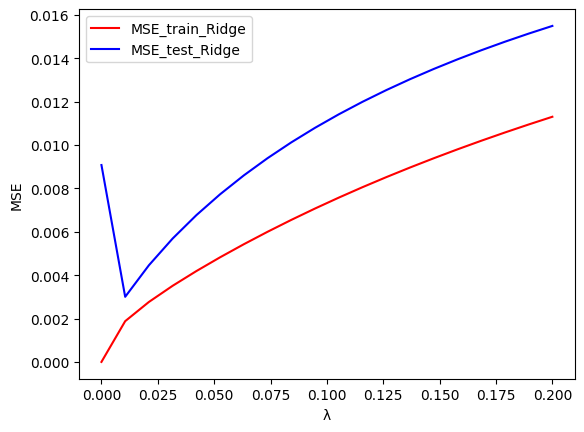

In [256]:
plt.plot(landa1,mean_squared_error_train_Ridge,color='red',label='MSE_train_Ridge')
plt.plot(landa1,mean_squared_error_test_Ridge,color='blue',label='MSE_test_Ridge')
plt.legend()
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()

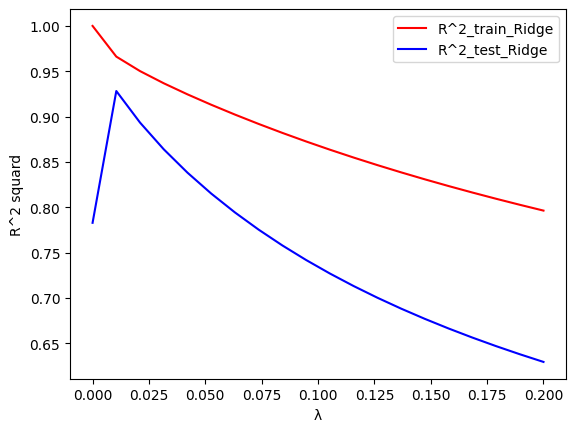

In [257]:
plt.plot(landa1,data_train_accurcy_list_Ridge,color='red',label='R^2_train_Ridge')
plt.plot(landa1,data_test_accurcy_list_Ridge,color='blue',label='R^2_test_Ridge')
plt.legend()
plt.xlabel('λ')
plt.ylabel('R^2 squard')
plt.show()

# Lasso regularization (L1)

In [269]:
landa1=np.linspace(0.1,1,100)
data_train_accurcy_list_Lasso=[]
data_test_accurcy_list_Lasso=[]
l2_norm_coeff_Lasso=[]
number_of_zeros_coeff_Lasso=[]
number_of_coeff_Lasso=[]
mean_squared_error_train_Lasso=[]
mean_squared_error_test_Lasso=[]

for landa in landa1:
  data_train_accurcy, data_test_accurcy, l2_norm_coeff, number_of_zeros_coeff, number_of_coeff,MSE_train,MSE_test=regularization(regu=1,landa=landa)

  data_train_accurcy_list_Lasso.append(data_train_accurcy['R2_squared_train'].values)
  data_test_accurcy_list_Lasso.append(data_test_accurcy['R2_squared_test'].values)
  l2_norm_coeff_Lasso.append(l2_norm_coeff)
  number_of_zeros_coeff_Lasso.append(number_of_zeros_coeff)
  number_of_coeff_Lasso.append(number_of_coeff)
  mean_squared_error_train_Lasso.append(MSE_train)
  mean_squared_error_test_Lasso.append(MSE_test)



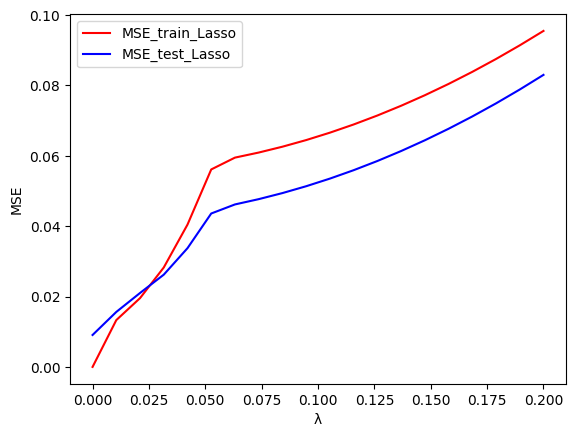

In [261]:
plt.plot(landa1,mean_squared_error_train_Lasso,color='red',label='MSE_train_Lasso')
plt.plot(landa1,mean_squared_error_test_Lasso,color='blue',label='MSE_test_Lasso')
plt.legend()
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()

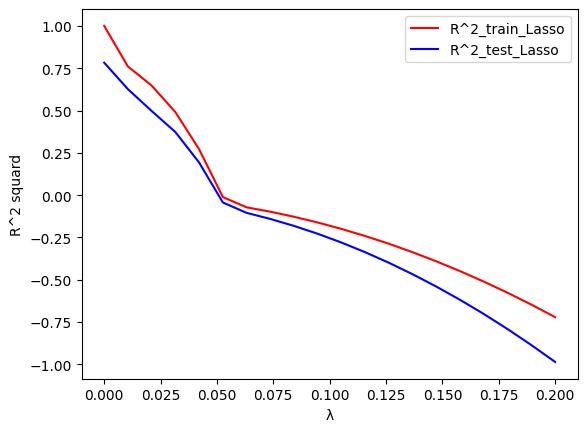

In [262]:
plt.plot(landa1,data_train_accurcy_list_Lasso,color='red',label='R^2_train_Lasso')
plt.plot(landa1,data_test_accurcy_list_Lasso,color='blue',label='R^2_test_Lasso')
plt.legend()
plt.xlabel('λ')
plt.ylabel('R^2 squard')
plt.show()

# Elastic Net regularization

In [270]:
landa1=np.linspace(0.1,1,100)
data_train_accurcy_list_Elastic=[]
data_test_accurcy_list_Elastic=[]
l2_norm_coeff_Elastic=[]
number_of_zeros_coeff_Elastic=[]
number_of_coeff_Elastic=[]
mean_squared_error_train_Elastic =[]
mean_squared_error_test_Elastic =[]
for landa in landa1:
  data_train_accurcy, data_test_accurcy, l2_norm_coeff, number_of_zeros_coeff, number_of_coeff,MSE_train,MSE_test=regularization(regu=0.1,landa=landa)

  data_train_accurcy_list_Elastic.append(data_train_accurcy['R2_squared_train'].values)
  data_test_accurcy_list_Elastic.append(data_test_accurcy['R2_squared_test'].values)
  l2_norm_coeff_Elastic.append(l2_norm_coeff)
  number_of_zeros_coeff_Elastic.append(number_of_zeros_coeff)
  number_of_coeff_Elastic.append(number_of_coeff)

  mean_squared_error_train_Elastic .append(MSE_train)
  mean_squared_error_test_Elastic .append(MSE_test)




#data_train_accurcy,data_test_accurcy,l2_norm_coeff,number_of_zeros_coeff,number_of_coeff=regularization(regu=0.1,landa=0.01)

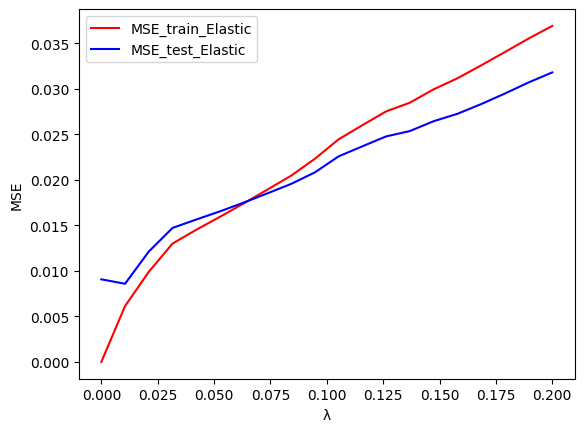

In [264]:
plt.plot(landa1,mean_squared_error_train_Elastic,color='red',label='MSE_train_Elastic')
plt.plot(landa1,mean_squared_error_test_Elastic,color='blue',label='MSE_test_Elastic')
plt.legend()
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()

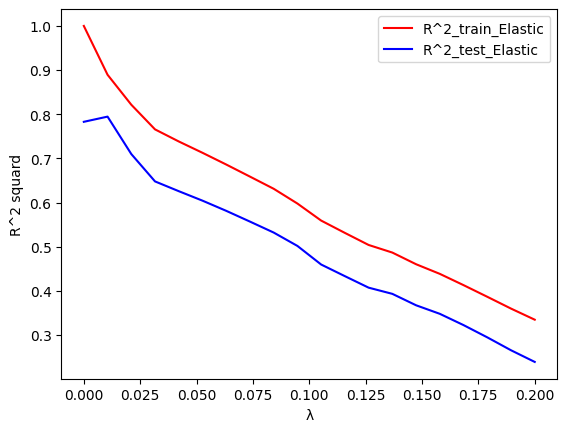

In [265]:
plt.plot(landa1,data_train_accurcy_list_Elastic,color='red',label='R^2_train_Elastic')
plt.plot(landa1,data_test_accurcy_list_Elastic,color='blue',label='R^2_test_Elastic')
plt.legend()
plt.xlabel('λ')
plt.ylabel('R^2 squard')
plt.show()

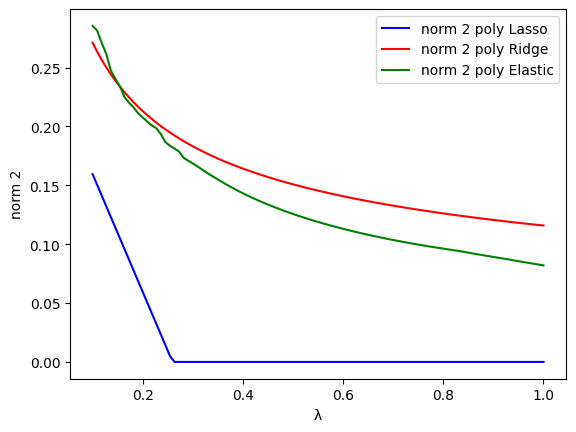

norm 2 poly: 8.718582624518284


In [271]:
#plt.plot(landa1,[l2_norm]*len(landa1),color='black',label='norm 2 poly')
plt.plot(landa1,l2_norm_coeff_Lasso,color='blue',label='norm 2 poly Lasso')
plt.plot(landa1,l2_norm_coeff_Ridge,color='red',label='norm 2 poly Ridge')
plt.plot(landa1,l2_norm_coeff_Elastic,color='green',label='norm 2 poly Elastic')
plt.legend()
plt.xlabel('λ')
plt.ylabel('norm 2')
plt.show()

print('norm 2 poly:',l2_norm)

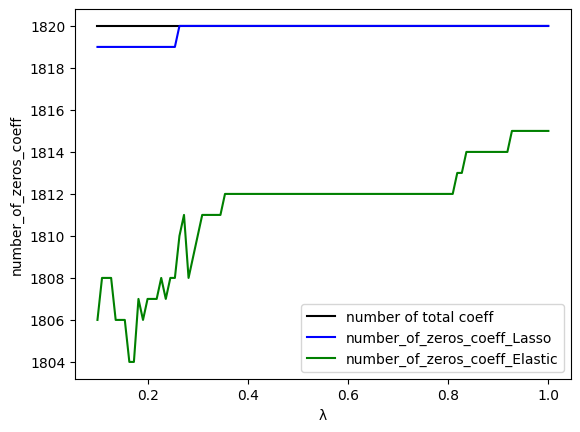

norm 2 poly: 8.718582624518284


In [272]:
plt.plot(landa1,number_of_coeff__Ridge,color='black',label='number of total coeff')
plt.plot(landa1,number_of_zeros_coeff_Lasso,color='blue',label='number_of_zeros_coeff_Lasso')
#plt.plot(landa1,number_of_zeros_coeff__Ridg,color='red',label='number_of_zeros_coeff__Ridg')
plt.plot(landa1,number_of_zeros_coeff_Elastic,color='green',label='number_of_zeros_coeff_Elastic')

plt.legend()
plt.xlabel('λ')
plt.ylabel('number_of_zeros_coeff')
plt.show()

print('norm 2 poly:',l2_norm)

# Time Series